# Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for pre-processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# For Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# For Ensemble model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

# Loading Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Statistical Analysis

In [ ]:
# Display basic statistics and information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

None

In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [ ]:
# Check for missing values
print(df.isnull().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


# EDA (Exploratory Data Analysis)

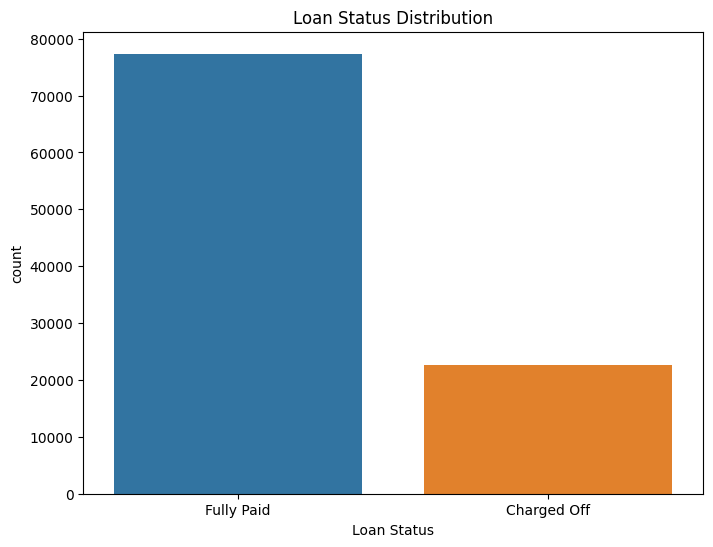

In [ ]:
# Loan Status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', data=df)
plt.title('Loan Status Distribution')
plt.savefig('Loan Status Distribution.png') #save the graph
plt.show()

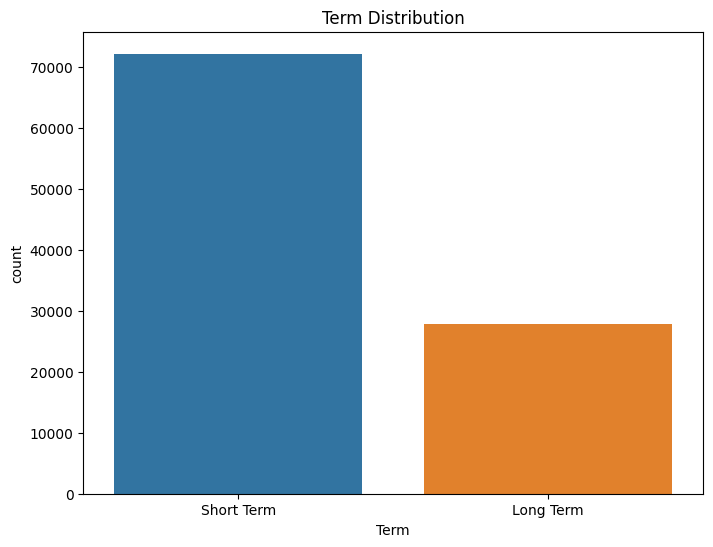

In [ ]:
# Term distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Term', data=df)
plt.title('Term Distribution')
plt.savefig('Term Distribution.png') #save the graph
plt.show()

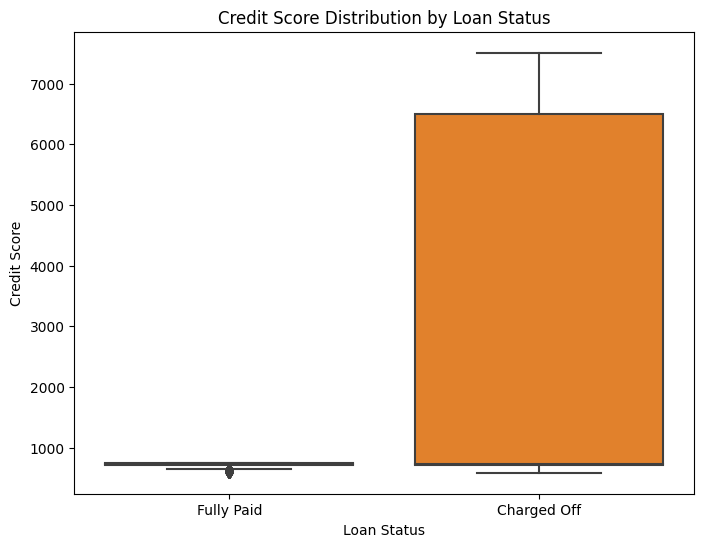

In [ ]:
# Boxplot of Credit Score by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Credit Score', data=df)
plt.title('Credit Score Distribution by Loan Status')
plt.savefig('Credit Score Distribution by Loan Status.png') #save the graph
plt.show()

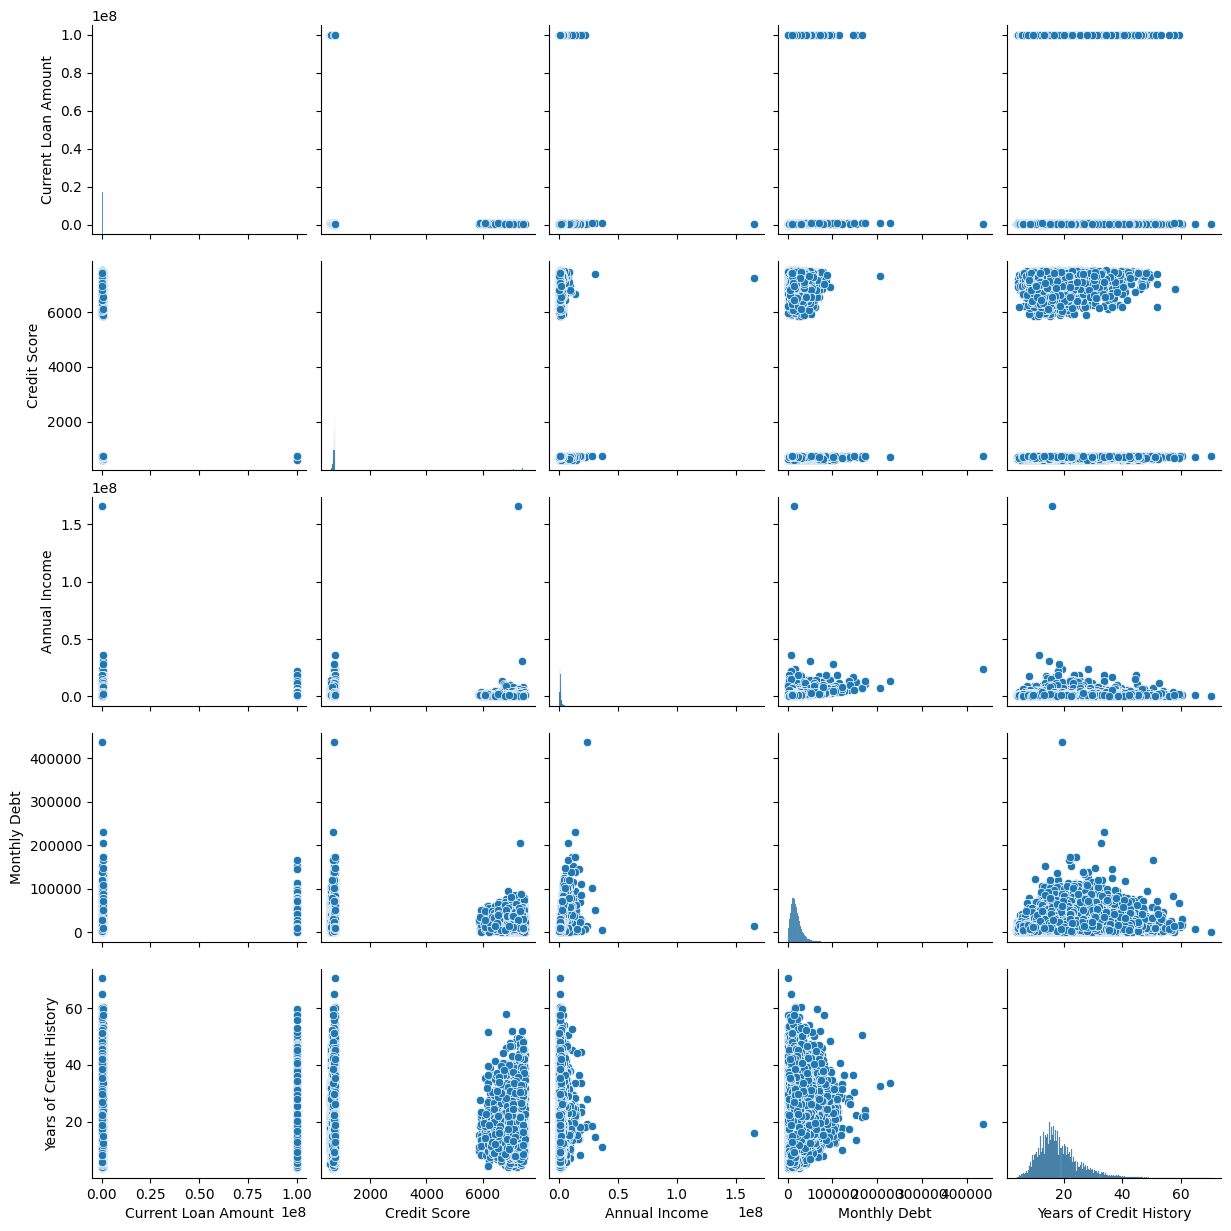

In [ ]:
# Pairplot for numerical columns
sns.pairplot(df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History']])
plt.savefig('Pairplot for numerical columns.png') #save the graph
plt.show()

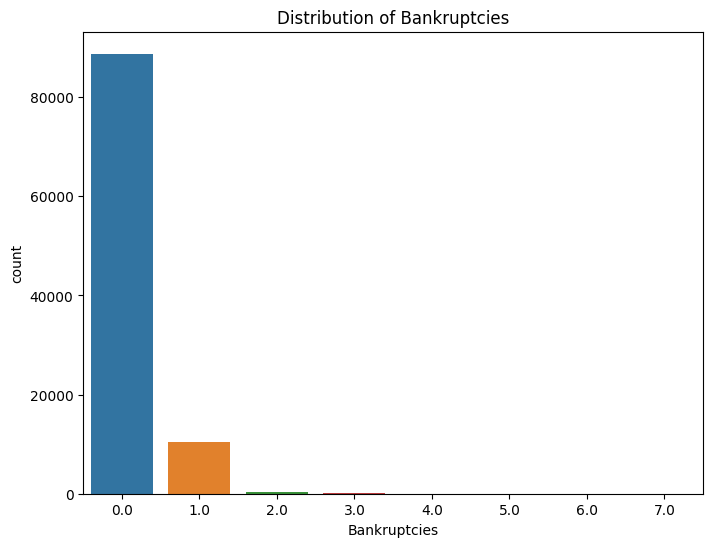

In [ ]:
# Distribution of Bankruptcies
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankruptcies', data=df)
plt.title('Distribution of Bankruptcies')
plt.savefig('Distribution of Bankruptcies.png') #save the graph
plt.show()

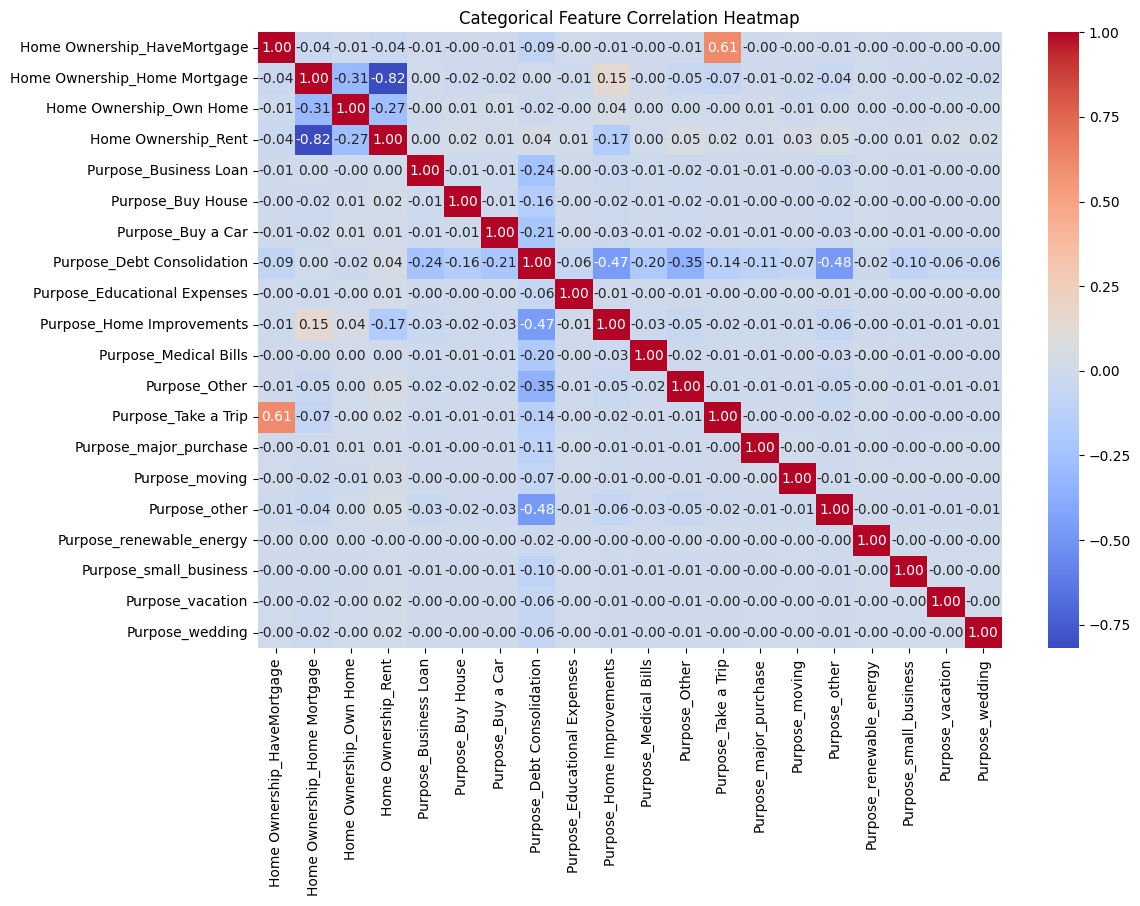

In [ ]:
# Example for Home Ownership and Purpose
plt.figure(figsize=(12, 8))
categorical_features = df[['Home Ownership', 'Purpose']]
sns.heatmap(pd.get_dummies(categorical_features).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Feature Correlation Heatmap')
plt.savefig('Categorical Feature Correlation Heatmap2.png') #save the graph
plt.show()

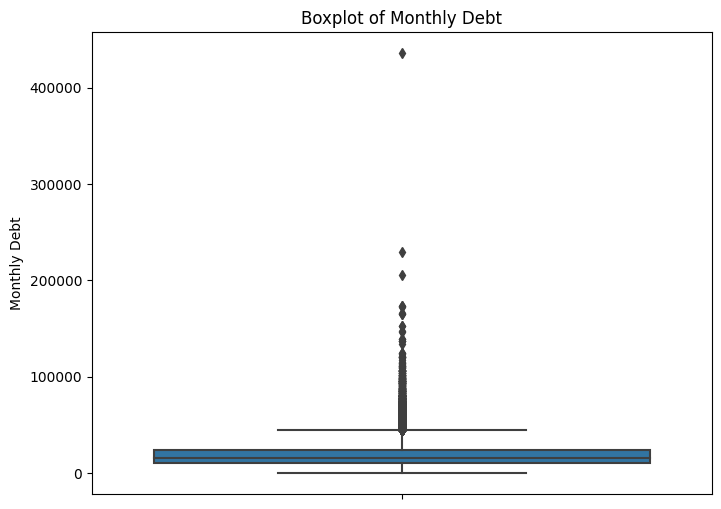

In [ ]:
# Example for Monthly Debt
plt.figure(figsize=(8, 6))
sns.boxplot(y='Monthly Debt', data=df)
plt.title('Boxplot of Monthly Debt')
plt.savefig('Boxplot of Monthly Debt.png') #save the graph
plt.show()

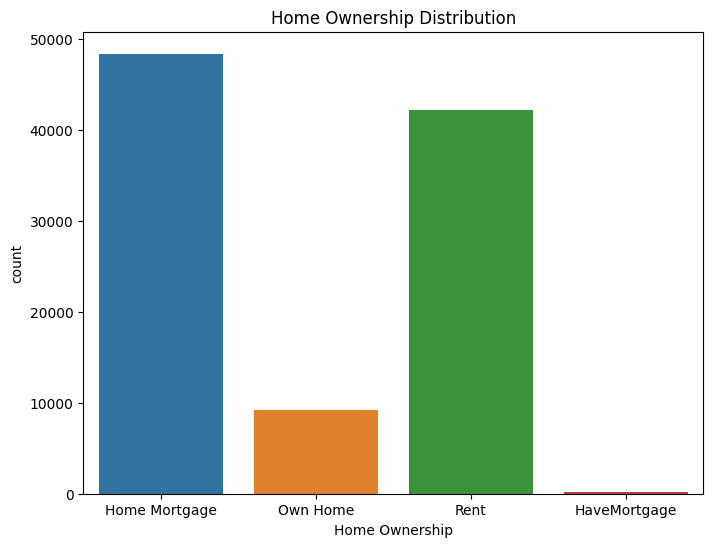

In [ ]:
# Example for Home Ownership
plt.figure(figsize=(8, 6))
sns.countplot(x='Home Ownership', data=df)
plt.title('Home Ownership Distribution')
plt.savefig('Home Ownership Distribution.png') #save the graph
plt.show()

# Data Preprocessing

#### 1. Filling missing values

In [ ]:
# Fill missing values in numeric columns with mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
# Check if there are any remaining missing values
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

#### 2. Drop the unnecessary columns

In [ ]:
# Drop columns which have ID's
columns_to_drop = ['Loan ID', 'Customer ID']  # List of column names to drop
df.drop(columns_to_drop,axis = 1, inplace = True)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  object 
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  object 
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  object 
 7   Purpose                       100514 non-null  object 
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

None

#### 3. One-Hot Encoding

In [ ]:
categorical_columns = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

#### 5. Correlation heatmap

In [ ]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Merge with the Original DataFrame
df_encoded = pd.concat([df, pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)

# Drop Original Categorical Columns (Optional)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
display(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Current Loan Amount             100514 non-null  float64
 1   Credit Score                    100514 non-null  float64
 2   Annual Income                   100514 non-null  float64
 3   Monthly Debt                    100514 non-null  float64
 4   Years of Credit History         100514 non-null  float64
 5   Months since last delinquent    100514 non-null  float64
 6   Number of Open Accounts         100514 non-null  float64
 7   Number of Credit Problems       100514 non-null  float64
 8   Current Credit Balance          100514 non-null  float64
 9   Maximum Open Credit             100514 non-null  float64
 10  Bankruptcies                    100514 non-null  float64
 11  Tax Liens                       100514 non-null  float64
 12  Loan Status_Full

None

#### 4. Filtered Target Columns

In [ ]:
df_filtered = df_encoded[df_encoded['Bankruptcies'].isin([0, 1])]

### Extract the target and feature columns

In [ ]:
X = df_filtered.drop(columns=['Bankruptcies'])  # Features
Y = df_filtered['Bankruptcies']     # Traget

### Selecting Best Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Specify the number of features (K) you want to select
k_best_value = 20

# Initialize SelectKBest with the scoring function (e.g., f_classif for classification)
k_best_selector = SelectKBest(score_func = f_classif, k = 20)

# Fit and transform the features
X_selected = k_best_selector.fit_transform(X, Y)

# Get the selected feature indices
selected_indices = k_best_selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Display the selected features
print("Selected Features:")
print(pd.Series(selected_features))

Selected Features:
0                      Annual Income
1                       Monthly Debt
2            Years of Credit History
3       Months since last delinquent
4            Number of Open Accounts
5          Number of Credit Problems
6             Current Credit Balance
7                Maximum Open Credit
8                          Tax Liens
9                    Term_Short Term
10    Years in current job_10+ years
11      Years in current job_2 years
12      Years in current job_3 years
13      Years in current job_4 years
14      Years in current job_5 years
15     Years in current job_< 1 year
16      Purpose_Educational Expenses
17         Purpose_Home Improvements
18                     Purpose_Other
19               Purpose_Take a Trip
dtype: object


In [ ]:
X_best  = X[list(selected_features)]

In [ ]:
X_best.head()

,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_< 1 year,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Other,Purpose_Take a Trip
0,1.167493e+06,5214.74,17.2,34.901321,6.0,1.0,228190.0,416746.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.378277e+06,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231892e+06,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.069490e+05,8741.90,12.0,34.901321,9.0,0.0,256329.0,386958.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.378277e+06,20639.70,6.1,34.901321,15.0,0.0,253460.0,427174.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying the Classifier Models

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nCross-validation scores: {cross_val_scores}")
    print(f"\nMean accuracy: {cross_val_scores.mean()}")
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision Tree ==========

Accuracy on test set: 0.9827

Cross-validation scores: [0.98224181 0.98060453 0.98066751 0.98117128 0.98104415]

Mean accuracy: 0.9811458569791732

Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17702
         1.0       0.92      0.92      0.92      2148

    accuracy                           0.98     19850
   macro avg       0.96      0.95      0.96     19850
weighted avg       0.98      0.98      0.98     19850


Confusion Matrix : 



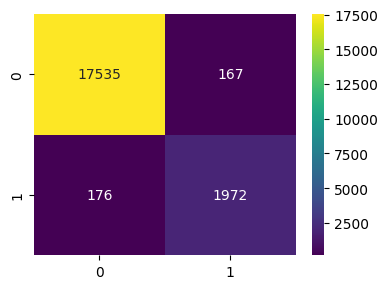

In [ ]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, dt_model, 'Decision Tree')

========== KNN Classifier ==========

Accuracy on test set: 0.9732

Cross-validation scores: [0.97191436 0.97166247 0.97210327 0.97361461 0.97342402]

Mean accuracy: 0.9725437458944477

Classification report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     17702
         1.0       0.88      0.87      0.88      2148

    accuracy                           0.97     19850
   macro avg       0.93      0.93      0.93     19850
weighted avg       0.97      0.97      0.97     19850


Confusion Matrix : 



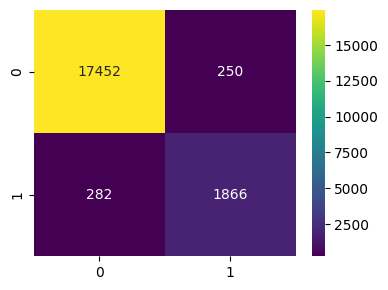

In [ ]:
# For KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_knn = modelEvaluation(pred_knn, y_test, knn_model,  'KNN Classifier')

========== Bernoulli Naive Bayes ==========

Accuracy on test set: 0.9691

Cross-validation scores: [0.96649874 0.96656171 0.96801008 0.96706549 0.96769318]

Mean accuracy: 0.9671658399644796

Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     17702
         1.0       0.81      0.93      0.87      2148

    accuracy                           0.97     19850
   macro avg       0.90      0.95      0.92     19850
weighted avg       0.97      0.97      0.97     19850


Confusion Matrix : 



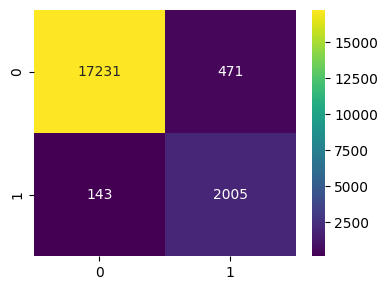

In [ ]:
# Naive Bayes Classifier
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)
results_nb = modelEvaluation(pred_nb, y_test, nb_model, 'Bernoulli Naive Bayes')


## Features Extraction using Naive Bayes

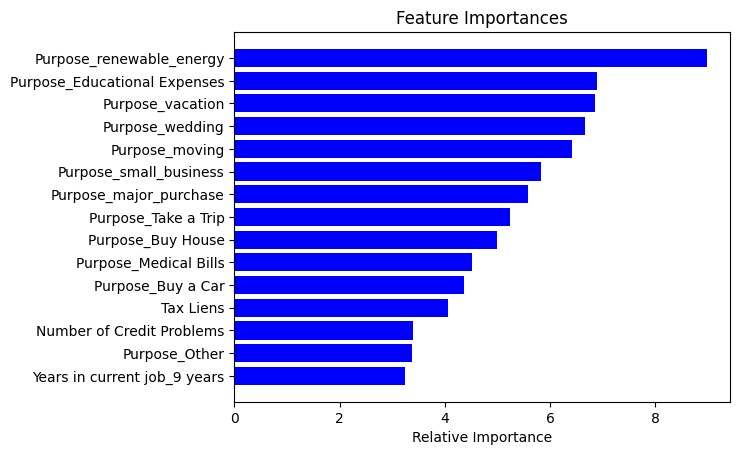

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting feature contributions (coefficients for BernoulliNB)
features = X.columns
coefficients = nb_model.feature_log_prob_[0]  # assuming binary classification, adjust if needed
indices = np.argsort(np.abs(coefficients))[-15:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), np.abs(coefficients[indices]), color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('Feature Contributions (Absolute Values).jpg')

========== Support Vector Classifier ==========

Accuracy on test set: 0.9845

Cross-validation scores: [0.98381612 0.98450882 0.98406801 0.98469773 0.9851376 ]

Mean accuracy: 0.9844456566448756

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     17702
         1.0       0.88      0.99      0.93      2148

    accuracy                           0.98     19850
   macro avg       0.94      0.99      0.96     19850
weighted avg       0.99      0.98      0.98     19850


Confusion Matrix : 



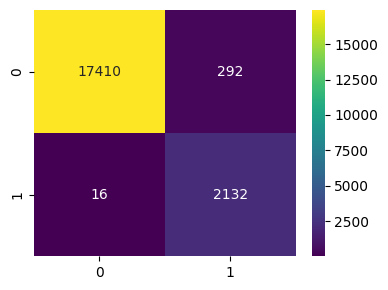

In [ ]:
# For Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_svc = modelEvaluation(pred_svc, y_test, svc_model, 'Support Vector Classifier')

========== Logistic Regression ==========

Accuracy on test set: 0.9843

Cross-validation scores: [0.98343829 0.98444584 0.98381612 0.98507557 0.98551546]

Mean accuracy: 0.9844582558622251

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     17702
         1.0       0.87      1.00      0.93      2148

    accuracy                           0.98     19850
   macro avg       0.94      0.99      0.96     19850
weighted avg       0.99      0.98      0.98     19850


Confusion Matrix : 



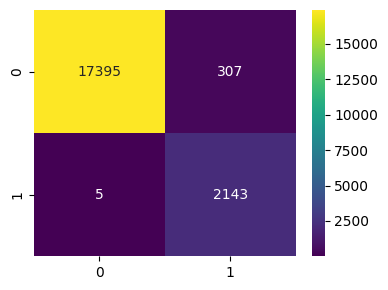

In [ ]:
# For Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr = modelEvaluation(pred_lr, y_test, lr_model, 'Logistic Regression')

### Ensemble model

========== Ensembele Model ==========

Accuracy on test set: 0.9875

Cross-validation scores: [0.98627204 0.98677582 0.98709068 0.98671285 0.98740475]

Mean accuracy: 0.9868512267600555

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17702
         1.0       0.91      0.98      0.94      2148

    accuracy                           0.99     19850
   macro avg       0.95      0.98      0.97     19850
weighted avg       0.99      0.99      0.99     19850


Confusion Matrix : 



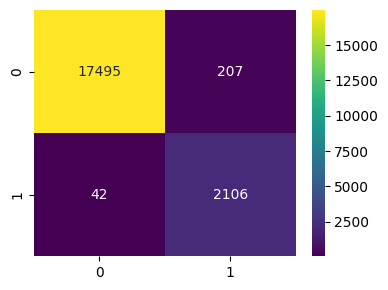

In [ ]:
# For Ensemble Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, rf_model,  'Ensembele Model')


# Models Evaluation

In [ ]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_dt,
    'Logistic Regression' : results_lr,
    'Naive Bayes' : results_nb,
    'SVC': results_svc,
    'KNN': results_knn,
    'Ensemble Model' : result_rf,
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))


+-----------+-----------------+-----------------------+---------------+----------+----------+------------------+
| Metrics   |   Decision tree |   Logistic Regression |   Naive Bayes |      SVC |      KNN |   Ensemble Model |
|-----------+-----------------+-----------------------+---------------+----------+----------+------------------|
| accuracy  |        0.98272  |              0.984282 |      0.969068 | 0.984484 | 0.973199 |         0.987456 |
| precision |        0.955994 |              0.937203 |      0.900772 | 0.93931  | 0.932975 |         0.954055 |
| recall    |        0.954315 |              0.990165 |      0.95341  | 0.988028 | 0.927296 |         0.984377 |
| f1-score  |        0.955152 |              0.961628 |      0.924855 | 0.961933 | 0.930111 |         0.968558 |
+-----------+-----------------+-----------------------+---------------+----------+----------+------------------+


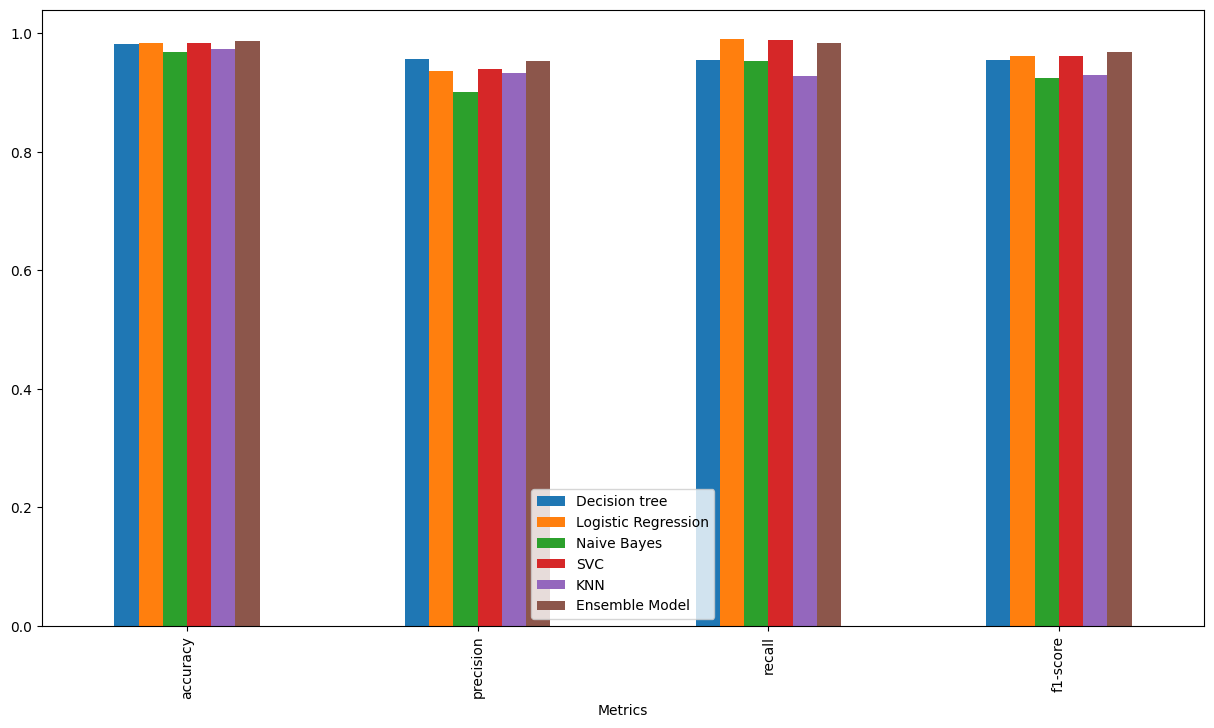

In [ ]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.savefig('Models Comparison.png') #save the graph
plt.show()

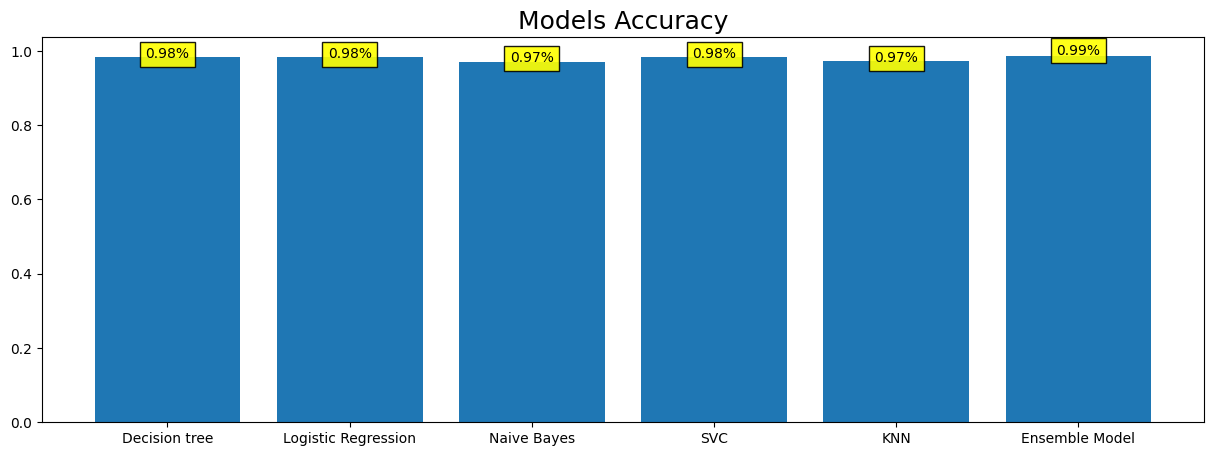

In [ ]:
# displaying the DataFrame
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.savefig('All models accuracy.png') #save the graph
plt.show()